In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
# from vis import *
from tickets import *
from minutes import *
from models import *

In [29]:
all = Tickets()
all.add([[1, 60]])

day_min = np.zeros((len(all.tickets), 2))
for i in range(len(all.tickets)):
    day_min[i, :] = Minutes.get_day_min(all.tickets[i])
print(day_min.shape)

parameters = [30, 5, 720, 60]

transform = Minutes.get_transform(parameters)

day_t, min_t = transform(day_min[:,0], day_min[:,1])
day_min_radius = Minutes.radius(day_t, min_t)
print(type(day_min_radius))
print(day_min_radius.shape)

radius_array = np.zeros((60, 1440))
for i, r in enumerate(day_min_radius):
    d, m = Minutes.get_day_min(all.tickets[i])
    radius_array[d-1, m] = r

(86400, 2)
<class 'numpy.ndarray'>
(86400,)


Pickle for breakup_prob_hist is up to date.
Pickle for expected_tickets is up to date.


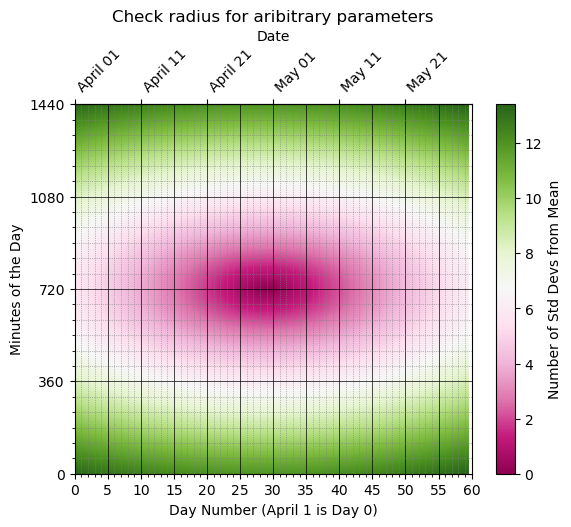

In [32]:
m = Models(model_id=1)
m.plot(radius_array, custom_label="Number of Std Devs from Mean",
       custom_title="Check radius for aribitrary parameters")